#### todo list

* [ ] add background image/openStreetMap
* [x] just highlight district hovered
* [ ] content list
* [x] export to html
* [ ] Laim daten nicht angezeigt
* [ ] Anzeige: Bezirks Namen ohne Leerzeichen
* [ ] Anzeige: Namen zu lange
* [ ] Notebook säubern für die Präsentation
* [ ] Animation: zwei Ortsteile (der Wahl) laufen durch die Jahre mit ihren drei Säulen
    - layout benutzen: column, row, grid, evtl tabs/panel
    - wenn ein Ortsteil selektiert wird, wird seine Statistik in das Diagramm mit aufgenommen
    - callbacks <> interaktiv
* [ ] Diagramm: 2xDropdown > 2xAuswahl zweier Stadtteile
    - einfach: 1xDropdown > Jahr > Vergleich zweier Stadtteile
    - komplex: Animation über Jahre: Vergleich zweier Stadtteile
* [ ] Kleine Diagramme (hover)
    - zeigt Verteilung über Zeit in jenem Bezirk

#### import neccesary packages - set neccesary variables

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [28]:
# optical separation of print outputs
def spacer(string=""):
    spacer_inlay = 7*"\*/*"
    spacer_string = spacer_inlay + "  [" + string + "]  " + spacer_inlay
    print("\n" + len(spacer_string)*"_" + "\n" + spacer_string + "\n")

#### load geographical data and adjust coordinate reference system

In [29]:
# load data
shapefile = 'data/munich.shp'
gdf = gpd.read_file(shapefile)

In [30]:
# string format for name
gdf.name = gdf.name.str.replace(" ", "").replace(",", "-")

In [31]:
# what is a gdf?
print(type(gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [32]:
spacer("gdf head")
print(gdf.head())

spacer("gdf info")
print(gdf.info())

spacer("gdf shape")
print(gdf.shape)

spacer("gdf.name unique")
print(gdf.name.unique())
print(gdf.name.sort_values())


______________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [gdf head]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

                  name  munich_ren  munich_r_1  munich_r_2  cartodb_id  \
0           BergamLaim       15.54        81.6          20          15   
1     Schwanthalerhöhe      -99.00        66.0           8           8   
2       Altstadt-Lehel       18.71        84.6          33          12   
3  Allach-Untermenzing       11.90        85.1          12           4   
4               Hadern       14.28        67.3          10           2   

   created_at  updated_at                                           geometry  
0  2015-07-21  2015-07-21  POLYGON ((11.6166043 48.1337163, 11.6179074 48...  
1  2015-07-21  2015-07-21  POLYGON ((11.5350379 48.1303296, 11.5326142 48...  
2  2015-07-21  2015-07-21  POLYGON ((11.5821098 48.133721, 11.5805171 48....  
3  2015-07-21  2015-07-21  POLYGON ((11.4597967 48.2117073, 11.460079 48....  
4  2015-07-21  2

In [33]:
# define the current crs 
# gdf.crs = {'init':'epsg:4326'}

# reproject to a new crs: mercator
gdf = gdf.to_crs({'init':'epsg:3395'})

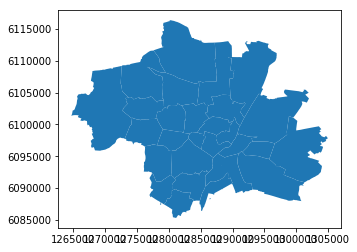

In [34]:
gdf.plot()

#### load numerical data

In [35]:
religion_file = "./data/munich_religion.csv"
religion = pd.read_csv(religion_file)

#### analyse data

In [36]:
spacer("head")
print(religion.head())

spacer("shape")
print(religion.shape)

spacer("info")
print(religion.info())


__________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [head]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

                Indikator   Ausprägung  Jahr  \
0  Religionszugehörigkeit  evangelisch  2017   
1  Religionszugehörigkeit  evangelisch  2017   
2  Religionszugehörigkeit  evangelisch  2017   
3  Religionszugehörigkeit  evangelisch  2017   
4  Religionszugehörigkeit  evangelisch  2017   

                Räumliche Gliederung  Indikatorwert  Basiswert 1  Basiswert 2  \
0                      Stadt München           11.4       174692      1526056   
1                01 Altstadt - Lehel           12.6         2631        20926   
2  02 Ludwigsvorstadt - Isarvorstadt           11.7         6033        51632   
3                     03 Maxvorstadt           13.7         7004        51311   
4                04 Schwabing - West           14.0         9555        68265   

   Basiswert 3  Basiswert 4  Basiswert 5  \
0          NaN          NaN          NaN   


In [37]:
spacer("dtypes")
print(religion.dtypes)

spacer("unique 'Indikator'")
print(religion.Indikator.unique())

spacer("unique 'Ausprägung'")
print(religion.Ausprägung.unique())

spacer("unique 'Räumliche Gliederung'")
print(religion["Räumliche Gliederung"].unique())

spacer("unique 'Name Basiswert 1'")
print(religion["Name Basiswert 1"].unique())

spacer("unique 'Name Basiswert 2'")
print(religion["Name Basiswert 2"].unique())

spacer("val_count 'Jahr'")
print(religion.Jahr.value_counts())


____________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [dtypes]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

Indikator                object
Ausprägung               object
Jahr                      int64
Räumliche Gliederung     object
Indikatorwert           float64
Basiswert 1               int64
Basiswert 2               int64
Basiswert 3             float64
Basiswert 4             float64
Basiswert 5             float64
Name Basiswert 1         object
Name Basiswert 2         object
Name Basiswert 3        float64
Name Basiswert 4        float64
Name Basiswert 5        float64
dtype: object

________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [unique 'Indikator']  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

['Religionszugehörigkeit']

_________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [unique 'Ausprägung']  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

['evangel

In [38]:
#spacer("unique - 'Basiswert' 1")
#print(religion["Basiswert 1"].unique())

#spacer("unique - 'Basiswert' 2")
#print(religion["Basiswert 2"].unique())

spacer("unique - 'Basiswert' 3")
print(religion["Basiswert 3"].unique())

spacer("unique - 'Basiswert' 4")
print(religion["Basiswert 4"].unique())

spacer("unique - 'Basiswert' 5")
print(religion["Basiswert 5"].unique())


____________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [unique - 'Basiswert' 3]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

[nan]

____________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [unique - 'Basiswert' 4]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

[nan]

____________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [unique - 'Basiswert' 5]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

[nan]


#### clean data

In [39]:
# find columns to drop
spacer("all cols")
print(religion.columns)

cols_to_drop = religion.columns[[0,4,7,8,9,10,11,12,13,14]]

spacer("cols to drop")
print(cols_to_drop)


______________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [all cols]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

Index(['Indikator', 'Ausprägung', 'Jahr', 'Räumliche Gliederung',
       'Indikatorwert', 'Basiswert 1', 'Basiswert 2', 'Basiswert 3',
       'Basiswert 4', 'Basiswert 5', 'Name Basiswert 1', 'Name Basiswert 2',
       'Name Basiswert 3', 'Name Basiswert 4', 'Name Basiswert 5'],
      dtype='object')

__________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [cols to drop]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

Index(['Indikator', 'Indikatorwert', 'Basiswert 3', 'Basiswert 4',
       'Basiswert 5', 'Name Basiswert 1', 'Name Basiswert 2',
       'Name Basiswert 3', 'Name Basiswert 4', 'Name Basiswert 5'],
      dtype='object')


In [40]:
# drop unneccesary columns
religion_clean = religion.drop(cols_to_drop, axis=1)

In [41]:
# rename columns
columns_old = religion_clean.columns
columns_new = ['religion', 'year', 'district', 'num_rel', 'num_total']
religion_clean.rename(columns=dict(zip(columns_old, columns_new)) ,inplace=True)

# simplify values in religion
religion_clean.religion = religion_clean.religion.map(
    dict(zip(religion_clean.religion.unique(), ['ev', 'rk', 'other'])))

# create district data frame: df_districts
district_numbers = pd.Series(religion_clean.district.unique()).map(lambda x:{x.split(" ", 1)[0] if x.split()[0].isdigit() else "00"})
district_numbers = [x.pop() for x in district_numbers]
district_names = pd.Series(religion_clean.district.unique()).map(lambda x:{x.split(" ", 1)[1] if x.split()[0].isdigit() else "Stadt München"})
district_names = [x.pop().replace(" ", "") for x in district_names]
df_districts = pd.DataFrame({'number':district_numbers, 'name':district_names, 'string':religion_clean.district.unique()})

spacer("df_district head")
print(df_districts.head())

religion_clean.district = religion_clean.district.map(
    dict(zip(df_districts.string, df_districts.number)))
religion_clean.district = religion_clean.district.astype(np.int64)

spacer("religion_clean head")
print(religion_clean.head())


______________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [df_district head]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

  number                          name                             string
0     00                  StadtMünchen                      Stadt München
1     01                Altstadt-Lehel                01 Altstadt - Lehel
2     02  Ludwigsvorstadt-Isarvorstadt  02 Ludwigsvorstadt - Isarvorstadt
3     03                   Maxvorstadt                     03 Maxvorstadt
4     04                Schwabing-West                04 Schwabing - West

_________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [religion_clean head]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

  religion  year  district  num_rel  num_total
0       ev  2017         0   174692    1526056
1       ev  2017         1     2631      20926
2       ev  2017         2     6033      51632
3       ev  2017         3     7004      5

In [42]:
# pivot table >>> mulitiindex: year, district
religion_piv = religion_clean.pivot_table(index=['year','district'], columns='religion', values='num_rel', aggfunc='sum')

# noramlize values
sum_series = 100/religion_piv.sum(axis=1)
religion_pivnorm = religion_piv.T.multiply(sum_series).T

# reorder religions
religion_final = religion_pivnorm.loc[:,['rk', 'ev', 'other']]

print(religion_final.head())

religion              rk         ev      other
year district                                 
2000 0         43.336266  15.274846  41.388888
     1         40.965495  16.229455  42.805051
     2         38.437830  13.603743  47.958426
     3         39.177012  16.900733  43.922255
     4         38.498578  17.713659  43.787763


In [43]:
# export "munich_districts.csv"
df_districts.drop('string', axis=1).to_csv('./data/munich_districts.csv')

#### check year 2017 seperately

-> check pandas youtube video - chapter 14 

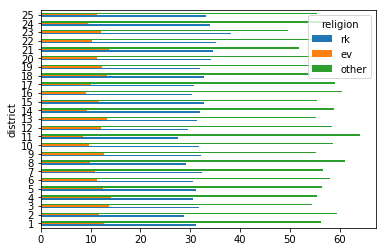

In [46]:
religion_2017 = religion_final.loc[2017]
religion_2017.drop(0, axis=0).plot(kind='barh', stacked=False, sort_columns=False)
#religion_2017.drop(0, axis=0).plot(kind='barh')

#### export plots for each district

In [50]:
for district_number in range(0,25):
    #print(df_districts.loc[district_number,'name'] + " - ANTEIL EVANGELISCH: " + str(religion_2017_pivoted_normalized.loc[district_number,"ev"]))
    
    categories = ['evangelisch', 'andere', 'römisch-katholisch']
    values = religion_2017.loc[district_number]
    
    plt.bar(categories, values)

    plt.xlabel('Religionen')
    plt.ylabel('Anteil')
    plt.title('Anteil der Religionen in ' + df_districts.loc[district_number,'name'])

    plt.tight_layout()
    plt.savefig('./data/plots/munich_religions_in_' + str(district_number) + '.png')
    plt.close()

#### add district_number to geographical data

In [51]:
spacer("type(gdf)")
print(type(gdf))

#compare names of districts:
spacer("compare names of districts - gdf")
print(gdf.name.sort_values())
print(len(gdf.name))

spacer("compare names of districts - df_districts")
print(df_districts.name.sort_values())


_______________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [type(gdf)]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

<class 'geopandas.geodataframe.GeoDataFrame'>

______________________________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [compare names of districts - gdf]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

3              Allach-Untermenzing
2                   Altstadt-Lehel
5                    Au-Haidhausen
17      Aubing-Lochhausen-Langwied
0                       BergamLaim
18                     Bogenhausen
16          Feldmoching-Hasenbergl
27         Forstenried-Fürstenried
25                        Freimann
24                         Giesing
4                           Hadern
23                      Harlaching
13                            Laim
8     Ludwigsvorstadt-Isarvorstadt
9                      Maxvorstadt
14            Milbertshofen-AmHart
11                         Moosach
7                    

In [52]:
# def district_number column in gdf - to merge with religion
gdf['district_number'] = np.nan
for gdf_name in gdf.name:
    for district_name in df_districts.name:
        if gdf_name in district_name:
            distr_number = df_districts.loc[df_districts.name == district_name, 'number'].values[0]
            gdf.loc[gdf.name == gdf_name, 'district_number'] = distr_number

In [53]:
# manually setting district numbers
gdf.loc[10,'district_number'] = "04" # Schwabing - West
gdf.loc[24,'district_number'] = "18" # Untergiesing - Harlaching
gdf.loc[26,'district_number'] = "19" # Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln

gdf.district_number = gdf.district_number.astype(int)

#### merge geographical and numerical data

In [54]:
#merge dataframes gdf and religion_2017
df_merged = gdf.merge(religion_2017.drop(0, axis=0), left_on='district_number', right_on='district')

In [55]:
# harlaching split twofold -> multipolygon -> just get big part
df_merged.loc[25,'geometry'] = df_merged.loc[25,'geometry'][0]

In [56]:
spacer("df_merged.head()")
print(df_merged.head())


______________________________________________________________________________
\*/*\*/*\*/*\*/*\*/*\*/*\*/*  [df_merged.head()]  \*/*\*/*\*/*\*/*\*/*\*/*\*/*

                  name  munich_ren  munich_r_1  munich_r_2  cartodb_id  \
0           BergamLaim       15.54        81.6          20          15   
1     Schwanthalerhöhe      -99.00        66.0           8           8   
2       Altstadt-Lehel       18.71        84.6          33          12   
3  Allach-Untermenzing       11.90        85.1          12           4   
4               Hadern       14.28        67.3          10           2   

   created_at  updated_at                                           geometry  \
0  2015-07-21  2015-07-21  POLYGON ((1293154.475422952 6097292.779394837,...   
1  2015-07-21  2015-07-21  POLYGON ((1284074.545309112 6096729.596830403,...   
2  2015-07-21  2015-07-21  POLYGON ((1289314.565247784 6097293.560995211,...   
3  2015-07-21  2015-07-21  POLYGON ((1275698.733238437 6110272.445110203,..

#### create json

In [57]:
import json

#Read data to json
merged_json = json.loads(df_merged.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)

#### bokeh work flow

In [58]:
# format the tooltip

from bokeh.models import HoverTool
tooltips = """
    <HTML>
        <HEAD>
            <style>
                .bk-tooltip {
                    opacity: .8 !important;
                    }
            </style>
        </HEAD>
        <BODY>
            <div>
                <div>
                    <img
                        src="./data/munich_kindl.png" height="42" alt="@imgs" width="42"
                        style="float: left; margin: 0px 10px 0px 20px;"
                        border="0"
                    ></img>
                </div>
                <div>
                    <span style="font-size: 10px; font-weight: bold;">@name</span>
                </div>
                <div>
                    <img
                        src="./data/plots/munich_religions_in_@district_number.png" height="42" alt="@imgs" width="42"
                        style="float: left; margin: 0px 0px 0px 0px; width: 200px; height: 150px;"
                        border="0"
                    ></img>
                </div>
            </div>
        </BODY>
    </HTML>
"""

hover = HoverTool(
    tooltips = tooltips
)

In [61]:
from bokeh.io import push_notebook, output_notebook, show, save, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar

# gut um mehrere Thematiken auf kleinen, Raum unterzukriegen
from bokeh.models.widgets import Tabs, Panel

# Anordnung der Diagramma
from bokeh.layouts import column, row, gridplot

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#print(type(geosource))

#Create figure object.
f = figure(title = 'Religionen in München', 
           plot_height = 600 , plot_width = 750, 
           #plot_height = 300 , plot_width = 375, 
           tools=[hover],
           toolbar_location = None)

f.xgrid.grid_line_color = None
f.ygrid.grid_line_color = None
f.xaxis.visible = False
f.yaxis.visible = False

#Add patch renderer to figure. 

#p.image_url(url=['./data/munich_image.png'], x=1240000, y=6125000, w=50000*1.875469, h=50000)
p = f.patches('xs','ys', 
          source = geosource,
          fill_color = 'blue', #{'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'blue', line_width = 0.1, fill_alpha = .05, line_alpha=.5,
          hover_fill_color="blue", hover_alpha=0.2, hover_line_color="white"
         )

#Specify figure layout.
#f.add_layout(color_bar, 'below')

# Add the HoverTool to the figure
#f.add_tools(HoverTool(tooltips=tooltips))

#Display figure inline in Jupyter Notebook.
output_notebook()
#output_file('./output.html')

#Display and export figure
target0 = show(f, notebook_handle=True)

#save(f, filename='./output.html')

Loading BokehJS ...

In [62]:
def turnOnAxis():
    f.xaxis.visible = True
    f.yaxis.visible = True
    push_notebook(handle=target)

In [63]:
def turnOffAxis():
    f.xaxis.visible = False
    f.yaxis.visible = False
    push_notebook(handle=target)

#### Vergleich aller Stadtteile für ein Jahr

In [154]:
#from bokeh.transform import factor_cmap
from bokeh.transform import dodge
from bokeh.models import ColumnDataSource
#from bokeh.models.widgets import Slider
from bokeh.layouts import row, column
import time

source = ColumnDataSource(religion_final.loc[2000].drop(0, axis=0))
plot = figure(plot_width=1000,
           plot_height=700,
           x_range = (0,70),
           y_range = (0,26),
           title="Anteile der Religionen in der Bezirken im Jahr " + str(2000),
           toolbar_location=None)

bar1 = plot.hbar(y=dodge('district', +0.25, range=plot.x_range), fill_color='green', height=.25, right='other', legend="andere Religionen", source=source, line_color="white")
bar2 = plot.hbar(y=dodge('district', +0.0, range=plot.x_range), fill_color='blue', height=.25, right='rk', legend="römisch-katholisch", source=source, line_color="white")
bar3 = plot.hbar(y=dodge('district', -0.25, range=plot.x_range), fill_color='red', height=.25, right='ev', legend="evangelisch", source=source, line_color="white")

plot.yaxis.ticker = list(range(1,26))
plot.yaxis.major_label_overrides = dict(zip(range(0,26), df_districts['name'].values))
plot.xaxis.axis_label = 'Prozent'
#p.xaxis.major_label_orientation = 1
#p.xgrid.grid_line_color = NoM
target = show(plot, notebook_handle=True)

year = 2000
should_run = True
while should_run:
    year +=1 
    if year == 2002: time.sleep(5)
    if year == 2017: should_run = False
        
    plot.title.text = "Anteile der Religionen in der Bezirken im Jahr " + str(year)
    
    source = ColumnDataSource(religion_final.loc[year].drop(0, axis=0))

    # since all bars have same source, setting one is enough
    bar1.data_source.data = source.data
    
    # push updates to the plot continuously using the handle (intererrupt the notebook kernel to stop)
    push_notebook(handle=target)
    time.sleep(.5)
    

In [213]:
#from bokeh.transform import factor_cmap
from bokeh.transform import dodge
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Button, Dropdown
from bokeh.layouts import row, column, WidgetBox, gridplot, grid
from ipywidgets import interact, IntSlider, Select
import time

# push updates to the plot continuously using the handle (intererrupt the notebook kernel to stop)
def pushNewDistrictsAndYear(district_1, district_2, year):
    plot2.title.text = "Anteile der Religionen in der Bezirken im Jahr " + str(year)
    source = ColumnDataSource(religion_final.loc[(year, [district_1, district_2]),:].loc[year].reset_index())
    bar21.data_source.data = source.data # since all bars have same source, setting one is enough
    plot2.yaxis.major_label_overrides = dict(zip([0,1], df_districts.loc[[district_1,district_2],'name'].values))
    push_notebook(handle=target2)

# animation
def runAnimation(startYear=2000):
    should_run = True
    year = startYear
    while should_run:
        #if year == 2002: time.sleep(5)
        pushNewDistrictsAndYear(district1, district2, year)
        year +=1
        if year > 2017: should_run = False
        time.sleep(.5)
        
def update (Bezirk1=df_districts.name.values[1], Bezirk2=df_districts.name.values[2], Jahr=2000):
    dis1 = int(df_districts[df_districts.name == Bezirk1].number)
    dis2 = int(df_districts[df_districts.name == Bezirk2].number)
    pushNewDistrictsAndYear(dis1, dis2, Jahr)


district1, district2 = 1, 2

source = ColumnDataSource(religion_final.loc[(2000, [district1, district2]),:].loc[2000].reset_index())
plot2 = figure(plot_width=800,
           plot_height=400,
           x_range = (0,100),
           y_range = (-.5,1.6),
           title="Anteile der Religionen in der Bezirken im Jahr " + str(2000),
           toolbar_location=None)

bar21 = plot2.hbar(y=dodge('index', +0.25, range=plot.x_range), fill_color='green', height=.25, right='other', legend="andere Religionen", source=source, line_color="white")
bar22 = plot2.hbar(y=dodge('index', +0.0, range=plot.x_range), fill_color='blue', height=.25, right='rk', legend="römisch-katholisch", source=source, line_color="white")
bar23 = plot2.hbar(y=dodge('index', -0.25, range=plot.x_range), fill_color='red', height=.25, right='ev', legend="evangelisch", source=source, line_color="white")

plot2.yaxis.ticker = [0,1]
plot2.yaxis.major_label_overrides = dict(zip([0,1], df_districts.loc[[district1,district2],'name'].values))
plot2.xaxis.axis_label = 'Prozent'
#p.xaxis.major_label_orientation = 1
#p.xgrid.grid_line_color = None

#slider = Slider(start=2000, end=2017, value=2000, step=1, title="years")
#button = Button(label="Start", button_type=None)
#button.on_click(callback)

slider = IntSlider(min=2000, max=2017, value=2000, description='Jahr: ')

def on_value_change(change):
    #print(change)
    #print(type(change['new']))
    update(Jahr=change['new'])
    
slider.observe(on_value_change, names='value')

print(df_districts.name.values.tolist()[0])

select_1 = Select(options=df_districts.name.values.tolist(), value=df_districts.name.values.tolist()[1], description='Bezirke :', disabled=False)
select_2 = Select(options=df_districts.name.values.tolist(), value=df_districts.name.values.tolist()[1], description='Bezirke :', disabled=False)

display(slider, select_1, select_2)

#target2 = show(column(slider, plot2, button), notebook_handle=True)
target2 = show(plot2, notebook_handle=True)
inter = interact(update, Jahr=(2000,2017), Bezirk1=df_districts.name.values, Bezirk2=df_districts.name.values)


#runAnimation()

#time.sleep(3)
#should_run = False
#print("Jetz gehts weiter!")






# !!!!!!!!!!!!!!!!!!!!!!!!!!!
# beide bezirke gleich >>>> nur einer wird angezeigt....

StadtMünchen


IntSlider(value=2000, description='Jahr: ', max=2017, min=2000)

Select(description='Bezirke :', index=1, options=('StadtMünchen', 'Altstadt-Lehel', 'Ludwigsvorstadt-Isarvorst…

Select(description='Bezirke :', index=1, options=('StadtMünchen', 'Altstadt-Lehel', 'Ludwigsvorstadt-Isarvorst…

interactive(children=(Dropdown(description='Bezirk1', index=1, options=('StadtMünchen', 'Altstadt-Lehel', 'Lud…